# Course:  Convolutional Neural Networks for Image Classification

## Section-6
### Visualize training process of filters

**Description:**  
*Compose video to show process of training filters for convolutional layer  
Demonstrate results*  

**File:** *visualize_filters.ipynb*

### Algorithm:

**--> Step 1:** Load saved CNN model  
**--> Step 2:** Load and assign best weights  
**--> Step 3:** Visualize filters of the 1st convolutional layer  
**--> Step 4:** Convert intermediate weights into images  


**Result:**  
- Images of intermediate weights

## Importing libraries

In [1]:
# Importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import h5py


from keras.models import load_model


## Setting up full path

In [2]:
# Full or absolute path to 'Section5' with designed models
# (!) On Windows, the path should look like following:
# r'C:\Users\your_name\PycharmProjects\CNNCourse\Section5'
# or:
# 'C:\\Users\\your_name\\PycharmProjects\\CNNCourse\\Section5'
full_path_to_Section5 = \
    'C:\\Users\\anaso\\OneDrive - Instituto Superior de Engenharia de Lisboa\\CNNCourse\\Section5'


## Defining function to plot filters

In [3]:
# Defining function to collect all filters in one grid
def convert_to_grid(x_input):
    # Getting shape values of the input
    number, height, width, channels = x_input.shape
    
    # Calculating grid size, number of rows and columns
    # Every element of the grid represents one filter
    grid_size = int(np.ceil(np.sqrt(number)))
    
    # Calculating height and width of entire grid according to
    # number of pixels along X and Y axes
    # Adding extra pixels to be as gaps in between filters
    grid_height = height * grid_size + (grid_size - 1)
    grid_width = width * grid_size + (grid_size - 1)
    
    # Creating Numpy array for the grid
    # Filling all grid pixels with white colour
    grid = np.zeros((grid_height, grid_width, channels)) + 255
    
    # Defining index for current filter
    n = 0
    
    # Defining positions for current filter along Y axis of the grid
    y_min, y_max = 0, height
    
    # Iterating all grid elements and filling them with filters' values
    # Iterating every row of the grid elements
    for y in range(grid_size):
        # Defining positions for current filter along X axis of the grid
        x_min, x_max = 0, width
        
        # Iterating every column of the current row
        for x in range(grid_size):
            # Checking if current index of the filter is less 
            # than total number of filters
            if n < number:
                # Getting current filter from the input
                filter_current = x_input[n]
                
                # Extracting minimum and maximum values of current filter
                f_min, f_max = np.min(filter_current), np.max(filter_current)
                
                # Scaling filter's values to be in range [0, 255]
                # Assigning scaled values to appropriate positions in the grid
                grid[y_min:y_max, x_min:x_max] = 255.0 * (filter_current - f_min) / (f_max - f_min)
                
                # Increasing index of current filter
                n += 1
            
            # Moving positions for current filter along X axis of the grid
            # Adding 1 pixel to be as gap in between filters
            x_min += width + 1
            x_max += width + 1
        
        # Moving positions for current filter along Y axis of the grid
        # Adding 1 pixel to be as gap in between filters
        y_min += height + 1
        y_max += height + 1
        
    # Returning grid filled with filters
    return grid


# Check point
print('Function to create a grid is successfully defined')
print()


# Check point
# Showing how function 'np.ceil' rounds the number
s = np.sqrt(15)
print(s)

c = np.ceil(s)
print(c)


Function to create a grid is successfully defined

3.872983346207417
4.0


### Custom dataset, 2nd RGB model

## Step 1: Loading saved 2nd model

In [4]:
# Loading 2nd model for custom dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
model_rgb = load_model(full_path_to_Section5 + '/' + 'custom' + '/' + 'model_2_custom_rgb.h5')


# Check point
print('Model is successfully loaded')


Model is successfully loaded


### Custom dataset, 2nd RGB model

## Step 2: Loading and assigning best weights

In [5]:
# loading and assigning best weights
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
model_rgb.load_weights('custom' + '/' + 'w_2_custom_rgb_255_mean_std.h5')


# Check point
print('Best weights for 2nd RGB model are loaded and assigned')


Best weights for 2nd RGB model are loaded and assigned


### Custom dataset, 2nd RGB model

## Step 3: Visualizing filters of convolutional layer

In [6]:
# Getting all the weights from entire model
w = model_rgb.get_weights()


# Check point
# Showing shape of the weights for convolutional layer
print(w[0].shape)


# Moving last dimension to the first position
# Reshaping Numpy array from
# (height, width, channels, number) to
# (number, height, width, channels)
w[0] = w[0].transpose(3, 0, 1, 2)


# Check point
# Showing shape of the weights for convolutional layer
print(w[0].shape)


(32, 32, 3, 64)
(64, 32, 32, 3)


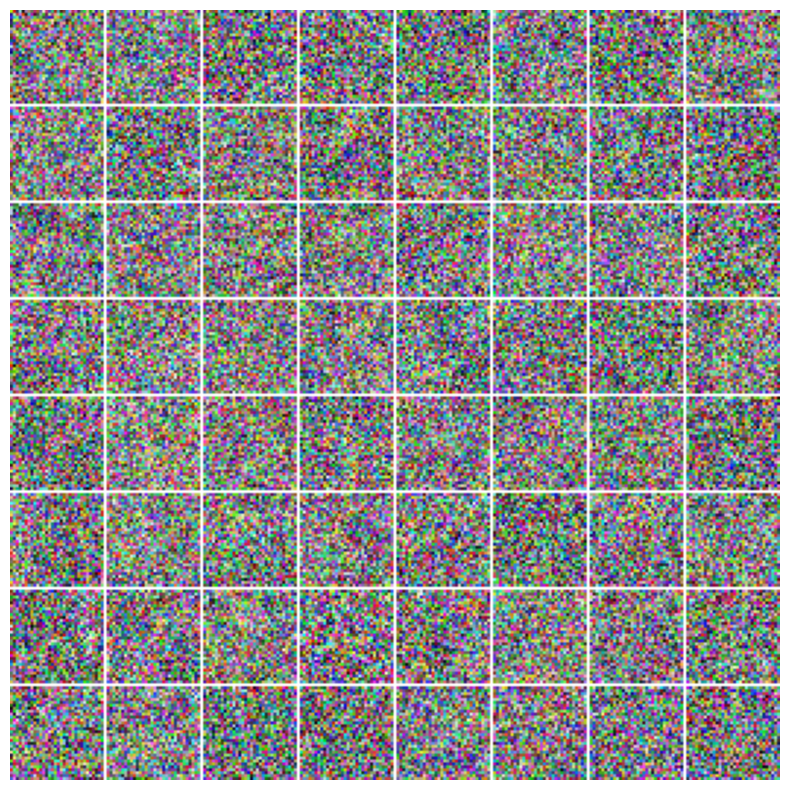

In [7]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Converting weights of convolutional layer into a grid
grid = convert_to_grid(w[0])


# Plotting the grid
plt.imshow(grid.astype('uint8'))


# Switching off axes
# Setting size of the plot (width, height) in inches
plt.axis('off')
plt.gcf().set_size_inches(10, 10)


# Showing the plot
plt.show()


### Custom dataset, 2nd model

## Step 4: Converting intermediate weights into images

In [8]:
# Iterating all saved intermediate weights
for i in range(350):
    # Opening saved binary file with intermediate weights
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File('custom/intermediate/' + '{0:04d}'.format(i) + \
                   '_w_2_custom_rgb_255_mean_std.h5', 'r') as f:
        # Extracting saved array with intermediate weights by appropriate key
        # Saving them into new variable
        weights = f['weights_layer_0']  # HDF5 dataset

        # Converting them into Numpy array
        weights = np.array(weights)  # Numpy arrays

    
    # Moving last dimension to the first position
    # Reshaping Numpy array from
    # (height, width, channels, number) to
    # (number, height, width, channels)
    weights = weights.transpose(3, 0, 1, 2)
    
    
    # Converting weights of convolutional layer into a grid
    grid = convert_to_grid(weights)
    
    
    # Plotting the grid
    plt.imshow(grid.astype('uint8'))
    
    
    # Switching off axes
    # Setting size of the plot (width, height) in inches
    plt.axis('off')
    plt.gcf().set_size_inches(10, 10)
    
    
    # Saving the plot into image file
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    plt.savefig('custom/intermediate/images/' + '{0:04d}'.format(i) + '.png', dpi=300)
    
    
    # Closing the plot
    plt.close()
    
    
    # Check point
    print('{0:04d}.png is created'.format(i))


0000.png is created
0001.png is created
0002.png is created
0003.png is created
0004.png is created
0005.png is created
0006.png is created
0007.png is created
0008.png is created
0009.png is created
0010.png is created
0011.png is created
0012.png is created
0013.png is created
0014.png is created
0015.png is created
0016.png is created
0017.png is created
0018.png is created
0019.png is created
0020.png is created
0021.png is created
0022.png is created
0023.png is created
0024.png is created
0025.png is created
0026.png is created
0027.png is created
0028.png is created
0029.png is created
0030.png is created
0031.png is created
0032.png is created
0033.png is created
0034.png is created
0035.png is created
0036.png is created
0037.png is created
0038.png is created
0039.png is created
0040.png is created
0041.png is created
0042.png is created
0043.png is created
0044.png is created
0045.png is created
0046.png is created
0047.png is created
0048.png is created
0049.png is created


OSError: Unable to open file (unable to open file: name = 'custom/intermediate/0050_w_2_custom_rgb_255_mean_std.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### CIFAR-10 dataset, 2nd model

## Step 1: Loading saved 2nd model

In [9]:
# Loading 2nd model for CIFAR-10 dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
model_rgb = load_model(full_path_to_Section5 + '/' + 'cifar10' + '/' + 'model_2_cifar10_rgb.h5')


# Check point
print('Model is successfully loaded')


Model is successfully loaded


### CIFAR-10 dataset, 2nd model

## Step 2: Loading and assigning best weights

In [10]:
# loading and assigning best weights
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
model_rgb.load_weights('cifar10' + '/' + 'w_2_cifar10_rgb_255_mean_std.h5')


# Check point
print('Best weights for 2nd RGB model are loaded and assigned')


OSError: Unable to open file (unable to open file: name = 'cifar10/w_2_cifar10_rgb_255_mean_std.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### CIFAR-10 dataset, 2nd model

## Step 3: Visualizing filters of convolutional layer

In [ ]:
# Getting all the weights from entire model
w = model_rgb.get_weights()


# Check point
# Showing shape of the weights for convolutional layer
print(w[0].shape)


# Moving last dimension to the first position
# Reshaping Numpy array from
# (height, width, channels, number) to
# (number, height, width, channels)
w[0] = w[0].transpose(3, 0, 1, 2)


# Check point
# Showing shape of the weights for convolutional layer
print(w[0].shape)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Converting weights of convolutional layer into a grid
grid = convert_to_grid(w[0])


# Plotting the grid
plt.imshow(grid.astype('uint8'))


# Switching off axes
# Setting size of the plot (width, height) in inches
plt.axis('off')
plt.gcf().set_size_inches(10, 10)


# Showing the plot
plt.show()


### CIFAR-10 dataset, 2nd model

## Step 4: Converting intermediate weights into images

In [ ]:
# Iterating all saved intermediate weights
for i in range(450):
    # Opening saved binary file with intermediate weights
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File('cifar10/intermediate/' + '{0:04d}'.format(i) + \
                   '_w_2_cifar10_rgb_255_mean_std.h5', 'r') as f:
        # Extracting saved array with intermediate weights by appropriate key
        # Saving them into new variable
        weights = f['weights_layer_0']  # HDF5 dataset

        # Converting them into Numpy array
        weights = np.array(weights)  # Numpy arrays

    
    # Moving last dimension to the first position
    # Reshaping Numpy array from
    # (height, width, channels, number) to
    # (number, height, width, channels)
    weights = weights.transpose(3, 0, 1, 2)
    
    
    # Converting weights of convolutional layer into a grid
    grid = convert_to_grid(weights)
    
    
    # Plotting the grid
    plt.imshow(grid.astype('uint8'))
    
    
    # Switching off axes
    # Setting size of the plot (width, height) in inches
    plt.axis('off')
    plt.gcf().set_size_inches(10, 10)
    
    
    # Saving the plot into image file
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    plt.savefig('cifar10/intermediate/images/' + '{0:04d}'.format(i) + '.png', dpi=300)
    
    
    # Closing the plot
    plt.close()
    
    
    # Check point
    print('{0:04d}.png is created'.format(i))


### MNIST dataset, 2nd model

## Step 1: Loading saved 2nd model

In [ ]:
# Loading 2nd model for MNIST dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
model_gray = load_model(full_path_to_Section5 + '/' + 'mnist' + '/' + 'model_2_mnist_gray.h5')


# Check point
print('Model is successfully loaded')


### MNIST dataset, 2nd model

## Step 2: Loading and assigning best weights

In [ ]:
# loading and assigning best weights
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
model_gray.load_weights('mnist' + '/' + 'w_2_mnist_gray_255_mean_std.h5')


# Check point
print('Best weights for 2nd GRAY model are loaded and assigned')


### MNIST dataset, 2nd model

## Step 3: Visualizing filters of convolutional layer

In [ ]:
# Getting all the weights from entire model
w = model_gray.get_weights()


# Check point
# Showing shape of the weights for convolutional layer
print(w[0].shape)


# Moving last dimension to the first position
# Reshaping Numpy array from
# (height, width, channels, number) to
# (number, height, width, channels)
w[0] = w[0].transpose(3, 0, 1, 2)


# Check point
# Showing shape of the weights for convolutional layer
print(w[0].shape)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Converting weights of convolutional layer into a grid
grid = convert_to_grid(w[0])


# Plotting the grid
plt.imshow(grid.astype('uint8'), cmap='gray')


# Switching off axes
# Setting size of the plot (width, height) in inches
plt.axis('off')
plt.gcf().set_size_inches(10, 10)


# Showing the plot
plt.show()


### MNIST dataset, 2nd model

## Step 4: Converting intermediate weights into images

In [ ]:
# Iterating all saved intermediate weights
for i in range(550):
    # Opening saved binary file with intermediate weights
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File('mnist/intermediate/' + '{0:04d}'.format(i) + \
                   '_w_2_mnist_gray_255_mean_std.h5', 'r') as f:
        # Extracting saved array with intermediate weights by appropriate key
        # Saving them into new variable
        weights = f['weights_layer_0']  # HDF5 dataset

        # Converting them into Numpy array
        weights = np.array(weights)  # Numpy arrays

    
    # Moving last dimension to the first position
    # Reshaping Numpy array from
    # (height, width, channels, number) to
    # (number, height, width, channels)
    weights = weights.transpose(3, 0, 1, 2)
    
    
    # Converting weights of convolutional layer into a grid
    grid = convert_to_grid(weights)
    
    
    # Plotting the grid
    plt.imshow(grid.astype('uint8'), cmap='gray')
    
    
    # Switching off axes
    # Setting size of the plot (width, height) in inches
    plt.axis('off')
    plt.gcf().set_size_inches(10, 10)
    
    
    # Saving the plot into image file
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    plt.savefig('mnist/intermediate/images/' + '{0:04d}'.format(i) + '.png', dpi=300)
    
    
    # Closing the plot
    plt.close()
    
    
    # Check point
    print('{0:04d}.png is created'.format(i))


### Traffic Signs dataset, 2nd model

## Step 1: Loading saved 2nd model

In [ ]:
# Loading 2nd model for Traffic Signs dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
model_rgb = load_model(full_path_to_Section5 + '/' + 'ts' + '/' + 'model_2_ts_rgb.h5')


# Check point
print('Model is successfully loaded')


### Traffic Signs dataset, 2nd model

## Step 2: Loading and assigning best weights

In [ ]:
# loading and assigning best weights
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
model_rgb.load_weights('ts' + '/' + 'w_2_ts_rgb_255_mean_std.h5')


# Check point
print('Best weights for 2nd RGB model are loaded and assigned')


### Traffic Signs dataset, 2nd model

## Step 3: Visualizing filters of convolutional layer

In [ ]:
# Getting all the weights from entire model
w = model_rgb.get_weights()


# Check point
# Showing shape of the weights for convolutional layer
print(w[0].shape)


# Moving last dimension to the first position
# Reshaping Numpy array from
# (height, width, channels, number) to
# (number, height, width, channels)
w[0] = w[0].transpose(3, 0, 1, 2)


# Check point
# Showing shape of the weights for convolutional layer
print(w[0].shape)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Converting weights of convolutional layer into a grid
grid = convert_to_grid(w[0])


# Plotting the grid
plt.imshow(grid.astype('uint8'))


# Switching off axes
# Setting size of the plot (width, height) in inches
plt.axis('off')
plt.gcf().set_size_inches(10, 10)


# Showing the plot
plt.show()


### Traffic Signs dataset, 2nd model

## Step 4: Converting intermediate weights into images

In [ ]:
# Iterating all saved intermediate weights
for i in range(400):
    # Opening saved binary file with intermediate weights
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File('ts/intermediate/' + '{0:04d}'.format(i) + \
                   '_w_2_ts_rgb_255_mean_std.h5', 'r') as f:
        # Extracting saved array with intermediate weights by appropriate key
        # Saving them into new variable
        weights = f['weights_layer_0']  # HDF5 dataset

        # Converting them into Numpy array
        weights = np.array(weights)  # Numpy arrays

    
    # Moving last dimension to the first position
    # Reshaping Numpy array from
    # (height, width, channels, number) to
    # (number, height, width, channels)
    weights = weights.transpose(3, 0, 1, 2)
    
    
    # Converting weights of convolutional layer into a grid
    grid = convert_to_grid(weights)
    
    
    # Plotting the grid
    plt.imshow(grid.astype('uint8'))
    
    
    # Switching off axes
    # Setting size of the plot (width, height) in inches
    plt.axis('off')
    plt.gcf().set_size_inches(10, 10)
    
    
    # Saving the plot into image file
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    plt.savefig('ts/intermediate/images/' + '{0:04d}'.format(i) + '.png', dpi=300)
    
    
    # Closing the plot
    plt.close()
    
    
    # Check point
    print('{0:04d}.png is created'.format(i))


### Some comments

To get more details for usage of 'np.sqrt':  
**print(help(np.sqrt))**
  
More details and examples are here:  
 - https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html  
  
  
To get more details for usage of 'np.ceil':  
**print(help(np.ceil))**
  
More details and examples are here:  
 - https://numpy.org/doc/stable/reference/generated/numpy.ceil.html  


In [ ]:
print(help(np.sqrt))

In [ ]:
print(help(np.ceil))